#SVM & Naive bayes

1. What is a Support Vector Machine (SVM)?
- A Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks, though it is more commonly used for classification problems.
- At its core, SVM tries to find the optimal hyperplane that best separates the data points of different classes in a feature space. The optimal hyperplane is the one that maximizes the margin between the classes, where the margin is the distance between the hyperplane and the nearest data points from each class. These nearest points are known as support vectors.

- Key Concepts >>
 - Linear SVM: Used when the data is linearly separable. It finds a straight line (in 2D) or a plane (in 3D and higher) to separate classes.
 - Non-linear SVM: Used when data is not linearly separable. It uses a technique called the kernel trick to map data into a higher-dimensional space where a linear separator might exist.
 - Kernels: Functions like polynomial, radial basis function (RBF), or sigmoid used to transform data for non-linear classification.
 - Margin: The gap between the closest data points (support vectors) of different classes and the hyperplane. SVM aims to maximize this margin.

2. What is the difference between Hard Margin and Soft Margin SVM?
- The difference between Hard Margin SVM and Soft Margin SVM lies in how strictly they separate the data points and how they handle misclassifications or overlap in data.


- Hard Margin SVM >>
  - Definition: Hard Margin SVM is used when the data is perfectly linearly separable—meaning, there is a clear boundary with no misclassification or overlap between the classes.
  - Behavior: It finds the maximum-margin hyperplane with no tolerance for misclassified data points.
  - Requirement: The data must be completely separable, otherwise, it will fail or overfit.
  - Data Requirement: Perfectly linearly separable
  - Misclassification: Not allowed
  - Flexibility: Less flexible
  - Risk of Overfitting: High on noisy data
  - Use Case: Only ideal when the dataset is clean and has no noise.


- Soft Margin SVM >>
  - Definition: Soft Margin SVM allows some misclassifications or overlap by introducing a penalty for data points that lie within the margin or are misclassified.
  - Behavior: It adds a regularization parameter (C) that controls the trade-off between maximizing the margin and minimizing classification error.
    - A lower C gives a wider margin but allows more misclassifications.
    - A higher C tries to reduce misclassifications but may lead to a smaller margin or overfitting.
  - Data Requirement: Can handle overlapping/noisy data
  - Misclassification: Allowed with penalty
  - Flexibility: More flexible
  - Risk of Overfitting: Lower due to controlled misclassification
  - Use Case: Suitable for real-world data that is noisy or not linearly separable.

3. What is the mathematical intuition behind SVM?
- The mathematical intuition behind SVM revolves around finding the hyperplane that best separates data points of different classes by maximizing the margin between them. Here's a step-by-step breakdown:
- Goal of SVM:SVM seeks a hyperplane (a line in 2D, a plane in 3D, etc.) that divides the dataset into two classes with the widest possible margin.
- Equation of the Hyperplane:
           A hyperplane can be written as:
                          wᵀx + b = 0
                          w: weight vector (defines the orientation of the hyperplane)
                          x: feature vector
                          b: bias (offset from the origin)

- Decision Rule:
  - If wᵀx + b ≥ +1, classify as Class 1
  - If wᵀx + b ≤ -1, classify as Class -1
  - The points satisfying wᵀx + b = ±1 lie on the margin boundaries
  - The region between these two lines is the margin

- Margin and Optimization:
        The distance between the two margin boundaries is:
        Margin = 2 / ||w||
        So, to maximize the margin, we minimize ||w||², subject to constraints:
        yᵢ (wᵀxᵢ + b) ≥ 1  for all i
        Where:
        yᵢ: actual class label (+1 or -1)
        xᵢ: feature vector for the ith sample
        This is a convex quadratic optimization problem with linear constraints.

- Soft Margin (with Slack Variables):For noisy or overlapping data, we introduce slack variables ξᵢ to allow some points to be inside the margin or misclassified:
        yᵢ (wᵀxᵢ + b) ≥ 1 - ξᵢ   and   ξᵢ ≥ 0
        The modified objective becomes:
        Minimize (1/2) * ||w||² + C * Σ ξᵢ
        C: Regularization parameter controlling margin vs. misclassification

- Non-Linear SVM with Kernel Trick:
If data is not linearly separable, SVM uses kernel functions to transform it into a higher-dimensional space where a linear hyperplane can separate it:
        K(xᵢ, xⱼ) = φ(xᵢ)ᵀ φ(xⱼ)
        Common kernels: RBF, Polynomial, Sigmoid





4. What is the role of Lagrange Multipliers in SVM?
- Lagrange Multipliers play a central role in the mathematical formulation of SVM by helping solve the constrained optimization problem efficiently. They convert the original problem of finding the optimal hyperplane into a form that can be solved using dual optimization.

- Why Lagrange Multipliers Are Needed: In SVM, we aim to:
           Minimize: (1/2) * ||w||²  
           Subject to the constraint: yᵢ (wᵀxᵢ + b) ≥ 1
  This is a convex optimization problem with inequality constraints. Such problems are typically solved using Lagrange Multipliers, which help incorporate the constraints into the objective function.

- Constructing the Lagrangian:We define the Lagrangian function using Lagrange multipliers αᵢ ≥ 0 (one for each data point):
          L(w, b, α) = (1/2) * ||w||² - Σ αᵢ [yᵢ (wᵀxᵢ + b) - 1]
          Here:
          αᵢ: Lagrange multiplier for each constraint
          L: Lagrangian function

- Dual Problem and Optimization:
By applying the Karush-Kuhn-Tucker (KKT) conditions, we convert the problem into its dual form, which depends only on αᵢ, not on w and b:
          Maximize:Σ αᵢ - (1/2) Σ Σ αᵢ αⱼ yᵢ yⱼ xᵢᵀ xⱼ
          Subject to:
          Σ αᵢ yᵢ = 0, and αᵢ ≥ 0
This dual formulation is easier to solve and also makes it possible to apply the kernel trick in non-linear SVMs.

- Support Vectors and Lagrange Multipliers:
  - Data points with αᵢ > 0 are the support vectors.
  - These are the only points that influence the decision boundary.
  - Other points (with αᵢ = 0) lie far from the margin and do not affect the model.

- Lagrange multipliers help incorporate constraints into the optimization problem.
- They allow the transformation of the primal problem into the dual problem.
- They reveal which data points are support vectors.
- They make it possible to implement kernel-based SVMs for non-linear classification.


5. What are Support Vectors in SVM?
- Support Vectors are the critical data points in a dataset that lie closest to the decision boundary (hyperplane) in a Support Vector Machine (SVM). They are the most influential samples that directly determine the position and orientation of the separating hyperplane.

- Definition:Support vectors are those data points for which the SVM constraint:
           yᵢ (wᵀxᵢ + b) = 1
 is exactly satisfied. These points lie on the margin boundaries, and the SVM uses them to construct the optimal hyperplane.

- Role in SVM:
   - They maximize the margin between classes.
   - The SVM model depends only on these vectors; all other data points have no effect on the final model.
   - If you remove non-support vectors, the hyperplane remains unchanged.But if you remove even one support vector, the hyperplane may shift.

- Identified by Lagrange Multipliers:
In the dual formulation of SVM, support vectors correspond to data points with non-zero Lagrange multipliers (αᵢ > 0).

- Geometric Intuition:
Imagine drawing the widest possible boundary between two classes — the data points that touch this boundary are the support vectors. They form the "support" for the margin, like pillars holding up a roof.

- Why Important:
  - hey make the model robust and efficient, since only a subset of the data affects the outcome.
  - Understanding which points are support vectors helps in model interpretation and dimensionality reduction.

- Support vectors are the closest data points to the decision boundary.
- They are the only points used to determine the optimal hyperplane.
- Their removal can change the classifier's decision boundary.
- Identified as points with non-zero Lagrange multipliers.

6. What is a Support Vector Classifier (SVC)?
- A Support Vector Classifier (SVC) is the classification version of the Support Vector Machine (SVM) algorithm. It is designed to classify data into categories by finding the optimal hyperplane that separates different classes with the maximum margin. SVC is especially effective for binary classification, but can also be extended to multi-class problems.

- Basic Idea:
 - SVC tries to find a decision boundary (hyperplane) that:
   - Separates classes as clearly as possible
   - Maximizes the margin, i.e., the distance between the boundary and the nearest data points (support vectors)

- Mathematical Formulation:
          Minimize: (1/2) * ||w||²  
          Subject to: yᵢ(wᵀxᵢ + b) ≥ 1 for all i
          This ensures that the margin is maximized, and data points are correctly classified.

- Soft Margin in SVC:In real-world data, perfect separation is often not possible. So, Soft Margin SVC introduces slack variables (ξᵢ) to allow some misclassifications:
          Minimize: (1/2) * ||w||² + C * Σ ξᵢ  
          Subject to: yᵢ(wᵀxᵢ + b) ≥ 1 - ξᵢ and ξᵢ ≥ 0
          C is a regularization parameter that balances margin width and classification errors.

- Kernelized SVC (Non-Linear Classification):
When data is not linearly separable, SVC uses kernel functions (like RBF, polynomial, etc.) to transform the data into higher dimensions where a linear hyperplane can separate the classes.


- SVC in Practice (Sklearn):
  - In Python, SVC is implemented in scikit-learn as:
         from sklearn.svm import SVC

         model = SVC(kernel='linear', C=1.0)
         model.fit(X_train, y_train)
         You can choose from various kernels such as 'linear', 'rbf', 'poly', etc.

- SVC is a classifier based on the Support Vector Machine algorithm.
- It finds the best hyperplane to separate classes with the widest margin.
- Supports linear and non-linear classification using kernel tricks.
- Uses support vectors (critical data points) to define the decision boundary.


7. What is a Support Vector Regressor (SVR)?
- A Support Vector Regressor (SVR) is the regression counterpart of the Support Vector Machine (SVM). While SVM and SVC are used for classification tasks, SVR is used to predict continuous numerical values by fitting the best line (or curve) within a tolerance margin (called epsilon) around the actual data.

- Main Idea:
  - SVR tries to find a function f(x) that:
    - Approximates the target values (y) as closely as possible
    - Ignores small errors within a specified epsilon (ε) margin
    - Minimizes model complexity, i.e., keeps the function as flat (simple) as possible

- Mathematical Objective:
  - SVR aims to:
           Minimize: (1/2) * ||w||²  
           Subject to:
           |yᵢ - (wᵀxᵢ + b)| ≤ ε  → errors within ε are allowed  
           Slack variables ξᵢ, ξᵢ* are introduced for points outside the ε-margin
           Final objective function becomes:
           Minimize: (1/2) * ||w||² + C * Σ (ξᵢ + ξᵢ*)
           Where:
           C is a regularization parameter controlling trade-off between flatness and tolerance to error
           ξᵢ, ξᵢ* are slack variables for under/over predictions


- Epsilon Tube (ε-tube):
  - SVR creates a margin of tolerance (ε-tube) around the predicted function.
  - Points within this ε-tube are not penalized.
  - Points outside the tube contribute to the loss (via slack variables).


- Kernel Support:
  - Like SVC, SVR supports non-linear regression using kernel functions like:
    - Linear
    - Polynomial
    - Radial Basis Function (RBF)
    - These kernels help in fitting complex relationships in high-dimensional space.


- SVR in Practice (Sklearn):
         from sklearn.svm import SVR

         model = SVR(kernel='rbf', C=100, epsilon=0.1)
         model.fit(X_train, y_train)

- SVR predicts continuous values using SVM principles.
- It fits the best function that stays within a margin of error (ε) from actual values.
- Only points outside the ε-tube influence the model (like support vectors).
- It supports non-linear regression through kernel tricks.



8. What is the Kernel Trick in SVM?
- The Kernel Trick is a powerful technique used in Support Vector Machines (SVM) to handle non-linearly separable data by implicitly mapping the input features into a higher-dimensional space — without actually computing the transformation. This allows SVMs to find a linear decision boundary in this transformed space, which corresponds to a non-linear boundary in the original space.

- Why It's Needed >>
  - In many real-world problems, data cannot be separated by a straight line (linear hyperplane). The kernel trick allows SVM to:
    - Operate in the original input space
    - Act as if it were performing complex computations in high dimensions
               
- Advantages of the Kernel Trick:
  - No need to explicitly transform the data into high-dimensional space
  - Saves computation and memory
  - Enables SVM to perform non-linear classification or regression
  - Can handle complex patterns and structures


- Example in Python (RBF Kernel):
        from sklearn.svm import SVC

        model = SVC(kernel='rbf', gamma=0.1)
        model.fit(X_train, y_train)
        Here, the RBF kernel is used without manually computing any high-dimensional features.

- The kernel trick allows SVM to learn non-linear patterns using linear algorithms.
- It works by computing the dot product in a high-dimensional space using a kernel function.
- It's efficient, scalable, and key to making SVMs powerful on complex data.

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel in SVM .
- The Linear, Polynomial, and RBF (Radial Basis Function) kernels are the most commonly used kernel functions in SVM. Each has its strengths depending on the nature of the data and the problem complexity. Here's a comparison based on several key aspects:

- Formula:
  - Linear Kernel:   K(x, x') = xᵀx'
  - Polynomial Kernel: K(x, x') = (xᵀx' + c)ᵈ
  - RBF Kernel (Gaussian): K(x, x') = exp(−γ‖x − x'‖²)

- Linearity:
  - Linear Kernel: Assumes data is linearly separable
  - Polynomial Kernel: Can handle moderate non-linear data
  - RBF Kernel: Handles complex non-linear data

- Flexibility:
  - Linear Kernel: Least flexible
  - Polynomial Kernel: Moderately flexible (depends on degree)
  - RBF Kernel: Highly flexible

- Computational Cost:
  - Linear Kernel: Low (fastest)
  - Polynomial Kernel: Medium
  - RBF Kernel: High (slowest)

- Overfitting Risk:
  - Linear Kernel: Low risk
  - Polynomial Kernel: Medium to high (especially with high degrees)
  - RBF Kernel: High if gamma is too large

- Use Cases:
  - Linear Kernel: High-dimensional, linearly separable data (e.g., text classification)
  - Polynomial Kernel: Data with a known polynomial relationship
  - RBF Kernel: Most general-purpose, non-linear data

- Key Hyperparameters:
  - Linear Kernel: C
  - Polynomial Kernel: C, degree, coef0
  - RBF Kernel: C, gamma

- Visualization Boundary:
  - Linear Kernel: Straight line/hyperplane
  - Polynomial Kernel: Curved boundary (depends on degree)
  - RBF Kernel: Highly curved and flexible boundary






10. What is the effect of the C parameter in SVM?
- The C parameter in Support Vector Machines (SVM) is a regularization parameter that controls the trade-off between maximizing the margin and minimizing classification errors. It plays a critical role in how the model handles misclassified data points.

- Meaning of C:
  - C is a penalty parameter of the error term.
  - It determines how much importance is given to misclassification.

- Effect of C (High vs Low):
 - High C value (e.g., C = 1000):
   - The model tries to classify all training data points correctly.
   - Margin becomes smaller (narrower).
   - Leads to less tolerance for misclassified points.
   - Risk of overfitting increases.

 - Low C value (e.g., C = 0.01):
   - The model allows some misclassifications in training.
   - Margin becomes larger (wider).
   - Better generalization on unseen data.
   - Risk of underfitting increases.

- Geometric Interpretation:
  - High C leads to a hard margin — tries to avoid any margin violations.
  - Low C leads to a soft margin — allows some slack and violations.

- Tuning C in Practice:
  - C is typically chosen via cross-validation.
  - Ideal value depends on the noise level and complexity of the data.

- C controls the balance between smooth decision boundary and correct classification of training points.
- High C → less misclassification, more complex model
- Low C → more tolerance to error, simpler model, better generalization



11. What is the role of the Gamma parameter in RBF Kernel SVM?
- In RBF (Radial Basis Function) Kernel SVM, the gamma (γ) parameter defines how far the influence of a single training point reaches. It controls the shape and complexity of the decision boundary by determining the curvature of the decision surface.

- Role of Gamma >>
 - Gamma determines how much influence each training point has:
   - High gamma → close influence (decision boundary very tight around data points)
   - Low gamma → far-reaching influence (smoother, more generalized boundary)

- Effect of Gamma (High vs Low) >>
 -  High Gamma (e.g., γ = 10):
   - Decision boundary is very sensitive to individual points.
   - Model creates tight, complex boundaries around the training data.
   - May lead to overfitting (good on training, poor on test data).

  - Low Gamma (e.g., γ = 0.001):
   - Each data point’s influence is spread out more broadly.
   - Leads to a smoother and simpler boundary.
   - May lead to underfitting (too simple to capture the pattern).

- Mathematical Insight >>
 - The RBF kernel formula is:
                   K(x, x') = exp(−γ * ||x − x'||²)
                   
  - If gamma is large, ||x - x'||² gets magnified → kernel value drops quickly → only very close points matter.
  - If γ is small, distant points also contribute.

- Choosing Gamma >>
  - Gamma is a hyperparameter and is often chosen through grid search or cross-validation.
  - A good gamma depends on dataset size, distribution, and noise level.

- Python Example >>
             from sklearn.svm import SVC

             # Low gamma: smooth decision boundary
             model_low_gamma = SVC(kernel='rbf', gamma=0.01)

             High gamma: tight boundary
             model_high_gamma = SVC(kernel='rbf', gamma=10)



             
  

12. What is the Naïve Bayes classifier, and why is it called "Naïve"?
- The Naïve Bayes classifier is a probabilistic machine learning model based on Bayes' Theorem, used for classification tasks. It is especially popular for text classification, spam detection, and sentiment analysis due to its simplicity and efficiency.

- Why It Is Called "Naïve" >>
 - It is called "Naïve" because it assumes that all features are independent of each other given the class label.
 - In reality, this assumption is rarely true, especially in natural language or image data, but the algorithm still performs surprisingly well in many practical scenarios.

- Example of the assumption:
 - If you’re classifying an email as spam or not, and the features are the words "free" and "money", Naïve Bayes assumes:
               P(free and money∣spam)=P(free∣spam)⋅P(money∣spam)
      This independence assumption simplifies the computation significantly.


- Naïve Bayes is a simple yet effective classifier based on Bayes’ Theorem.
- it's called “Naïve” because it assumes feature independence, which simplifies calculations.
- Despite its simplicity, it often gives strong results in real-world applications.


13. What is Bayes’ Theorem?
- Bayes' Theorem is a fundamental principle in probability theory that describes how to update the probability of a hypothesis based on new evidence. It forms the core of Bayesian inference and is used extensively in Naïve Bayes classifiers, medical diagnosis, spam filtering, and many other fields.

- Bayes’ Theorem Formula >>
            P(A|B) = [P(B|A) * P(A)] / P(B)
            Where:
            P(A|B): Posterior probability (probability of event A occurring given B is true)
            P(B|A): Likelihood (probability of event B occurring given A is true)
            P(A): Prior probability of A (before seeing evidence)
            P(B): Marginal probability of B (the evidence)

- Interpretation >>
  - Bayes’ Theorem allows you to recalculate the probability of a hypothesis (A) after observing some evidence (B).
   - Prior (P(A)): What you believed before seeing the evidence.
   - Likelihood (P(B|A)): How likely the evidence is, assuming the hypothesis is true.
   - Posterior (P(A|B)): What you believe after seeing the evidence.

- Simple Example >>
  - Imagine a disease that affects 1 in 1000 people (P(Disease) = 0.001). A test detects it with:
    - 99% true positive rate (P(Positive|Disease) = 0.99)
    - 5% false positive rate (P(Positive|No Disease) = 0.05)

  - What is the chance you actually have the disease if you test positive?
   - Using Bayes’ Theorem:
                    P(Disease|Positive) = [P(Positive|Disease) * P(Disease)] / P(Positive)
  - This gives a surprisingly low probability, showing why Bayes' Theorem is crucial in decision-making under uncertainty.

- Use in Naïve Bayes >>
  - In classification, Bayes’ Theorem helps calculate:
              P(Class | Features) = [P(Features | Class) * P(Class)] / P(Features)
     Then, the class with the highest probability is chosen.

14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.
- These three are variants of the Naïve Bayes classifier, each suited to different types of data and distributions. Here's a breakdown in list format with clear distinctions:

- Differences between Gaussian, Multinomial, and Bernoulli Naïve Bayes:

- Data Type Supported >>
  - Gaussian NB: Works with continuous (real-valued) features.
  - Multinomial NB: Works with discrete count features (e.g., word counts).
  - Bernoulli NB: Works with binary (0 or 1) features (e.g., presence/absence).

- Distribution Assumed >>
  - Gaussian NB: Assumes data follows a Normal (Gaussian) distribution.
  - Multinomial NB: Assumes features follow a Multinomial distribution.
  - Bernoulli NB: Assumes features follow a Bernoulli distribution.

- Feature Representation >>
  - Gaussian NB: Uses mean and variance of continuous variables.
  - Multinomial NB: Uses term frequencies (e.g., number of times a word occurs).
  - Bernoulli NB: Uses binary occurrence (1 if present, 0 if absent).

- Typical Use Cases >>
  - Gaussian NB: Predicting based on continuous features (e.g., height, weight).
  - Multinomial NB: Text classification using word counts (e.g., spam detection).
  - Bernoulli NB: Binary text classification using word presence (e.g., document classification with binary features).

- Sensitivity >>
  - Gaussian NB: Sensitive to outliers due to continuous nature.
  - Multinomial NB: Sensitive to word frequency.
  - Bernoulli NB: Sensitive to feature presence, not frequency.



15. When should you use Gaussian Naïve Bayes over other variants?
- You should use Gaussian Naïve Bayes (GNB) when your features are continuous numeric values and you believe (or assume) that these features are normally distributed within each class.

- Use Gaussian Naïve Bayes when:

- Your dataset has continuous variables:
  - Features like height, weight, temperature, age, income, etc.
  - Other variants (Multinomial, Bernoulli) are not designed for continuous data.

- Feature values are (approximately) normally distributed:
  - GNB assumes each feature follows a Gaussian (bell-shaped) curve within each class.
  - It works best when this assumption is true or close to true.

- You want fast training with small datasets:
  - GNB is computationally efficient and performs well even with limited training data.

- You need fast computation and scalability:
  - Very useful in real-time applications due to its low computational cost.
  - Can scale easily to high-dimensional data with continuous values.

- You're dealing with clean numeric data in the following domains:
  - Medical Diagnosis - E.g., Classifying patients based on blood pressure, sugar level, cholesterol, etc.
  - Financial Modeling - E.g., Predicting credit risk, loan approval based on continuous customer features.
  - Sensor Data Classification - E.g., Predicting device failures using sensor readings like vibration, temperature.
  -  Student Performance Analysis - E.g., Predicting pass/fail based on continuous scores and attendance data.
  - Environmental Modeling - E.g., Predicting air quality index or pollution category based on continuous features.
  - Scientific Research & Lab Analysis - E.g., Classifying samples or conditions based on continuous experimental data.

- When interpretability and simplicity are needed:
  - The model is mathematically interpretable and doesn’t require complex tuning.
  - Ideal for educational use or when explaining model decisions is important.

16. What are the key assumptions made by Naïve Bayes?
- Naïve Bayes is a probabilistic classification algorithm based on Bayes' Theorem. Its performance and simplicity rely on a few key assumptions:

- Key Assumptions of Naïve Bayes >>

- Feature Independence (Strong Naïve Assumption):
  - It assumes that all features are conditionally independent of each other given the class label.
  - Mathematically:
              P(x₁, x₂, ..., xₙ | y) = P(x₁ | y) * P(x₂ | y) * ... * P(xₙ | y)
  - This is rarely true in practice, but the model often works well despite this simplification.

- Each Feature Contributes Equally and Independently:
  - Every feature contributes independently and equally to the probability of the outcome.
  - No feature is considered more important unless explicitly weighted (e.g., with feature engineering).

- Correct Model Type Assumed for Data:
  - Depending on the variant used:
    - Gaussian NB assumes features are normally distributed
    - Multinomial NB assumes features are frequency counts
    - Bernoulli NB assumes features are binary (0 or 1)
  - The model performance depends on whether your data matches these distributions.

- All Features are Relevant to Classification:
  - Naïve Bayes assumes that each input feature is useful for predicting the class label.
  - Irrelevant or noisy features can reduce model accuracy.

17. What are the advantages and disadvantages of Naïve Bayes?
- Naïve Bayes is a popular classification algorithm known for its simplicity and speed, but it also has certain limitations. Here's a clear list of advantages and disadvantages:

- Advantages of Naïve Bayes >>
 - Simple and Fast - Very easy to implement and computationally efficient, both during training and prediction.
 - Works Well with Small Datasets- Performs well even with limited training data, making it suitable for early-stage projects.
 - Scales Easily to Large Datasets - Can handle large numbers of features and high-dimensional data, especially in text classification.
 - Performs Well with Text Data - Especially effective for spam detection, sentiment analysis, and document classification using Multinomial or Bernoulli Naïve Bayes.
 - Handles Irrelevant Features Well - Despite the strong independence assumption, it can perform reasonably well even when irrelevant features are present.
 - Probabilistic Output - Gives class probabilities, which can be helpful in decision-making or ranking tasks.

- Disadvantages of Naïve Bayes >>
 - Strong (Naïve) Independence Assumption - Assumes all features are conditionally independent given the class label — which is rarely true in real-world data.
 - Limited Expressiveness - Can’t model interactions between features, which limits performance on complex tasks.
 - Zero Probability Problem - If a feature value was not seen in the training data, the model assigns zero probability.
  - This can be handled using Laplace Smoothing.

 - Assumption of Correct Distribution -
   - Each variant assumes a specific distribution:
    - Gaussian for real-valued features
    - Multinomial for count data
   - Bernoulli for binary data
  - Misusing these assumptions can decrease accuracy.

 - Not Ideal for Highly Correlated Features - Correlation between features violates the independence assumption and can hurt performance.

18. Why is Naïve Bayes a good choice for text classification?
- Naïve Bayes is widely used in text classification tasks because of its simplicity, efficiency, and surprisingly strong performance on high-dimensional textual data.

- Reasons Why Naïve Bayes Is a Good Choice for Text Classification >>

- Works Well with High-Dimensional Data:
  - Text data typically has thousands of features (words/tokens).
  - Naïve Bayes handles this efficiently without becoming slow or overfitting.

- Assumption of Feature Independence Fits Well:
  - In text, words are often treated as independent features, which aligns well with Naïve Bayes' independence assumption.

- Fast Training and Prediction:
  - Training is extremely fast, even on large corpora.
  - Useful for real-time or large-scale applications like spam filters or news categorization.

- Works Well with Sparse Data:
  - Text data is sparse (most documents contain only a few words from the vocabulary).
  - Naïve Bayes performs well on sparse matrices from Bag of Words or TF-IDF features.

- Effective with Small Amounts of Labeled Data:
  - Can learn meaningful patterns even from a relatively small labeled dataset, unlike deep learning models which need lots of data.

- Probabilistic Classification:
  - Provides probabilities for each class, which is useful when ranking documents or dealing with multi-label problems.

- Variants Are Tailored for Text:
  - Multinomial Naïve Bayes models word frequencies (most suitable for document classification).
  - Bernoulli Naïve Bayes can be used when modeling binary presence/absence of words.

- Naïve Bayes is a strong baseline for text classification because it's fast, scalable, easy to implement, and performs surprisingly well on high-dimensional and sparse text data, especially when using Multinomial Naïve Bayes.

19. Compare SVM and Naïve Bayes for classification tasks.
- Here is a clear comparison of Support Vector Machine (SVM) and Naïve Bayes

- Model Type >>
  - SVM: Discriminative – focuses on finding the optimal boundary between classes.
  - Naïve Bayes: Generative – models how the data is generated for each class.

- Assumptions >>
  - SVM: Makes no assumption about data distribution.
  - Naïve Bayes: Assumes strong feature independence and specific feature distribution (Gaussian, Multinomial, etc.).

- Accuracy >>
  - SVM: Often achieves higher accuracy on complex datasets.
  - Naïve Bayes: Good accuracy on simple or well-separated datasets.

- Speed & Training Time >>
  - SVM: Slower training due to optimization (especially on large datasets).
  - Naïve Bayes: Very fast training and prediction.

- Data Type Compatibility >>
  - SVM: Works with both continuous and sparse data.
  - Naïve Bayes: Best with discrete (e.g., text counts) or binary data.

- Text Classification >>
  - SVM: Performs well, especially with a linear kernel.
  - Naïve Bayes: Excellent, especially Multinomial NB for text and NLP tasks.

- Interpretability >>
  - SVM: Less interpretable due to complex decision boundaries.
  - Naïve Bayes: Highly interpretable with clear probabilistic outputs.

- Noise & Outlier Handling >>
  - SVM: Sensitive to outliers; can misclassify if margin is distorted.
  - Naïve Bayes: More robust to irrelevant and noisy features.

- Dataset Size Requirement >>
  - SVM: Performs better with more training data.
  - Naïve Bayes: Performs well with small amounts of data.

- Multiclass Classification >>
  - SVM: Needs One-vs-One or One-vs-Rest strategies.
  - Naïve Bayes: Natively supports multiclass classification.

20. How does Laplace Smoothing help in Naïve Bayes?
- Laplace Smoothing (also called add-one smoothing) is used in Naïve Bayes to handle the zero probability problem. This problem arises when a categorical feature value doesn’t appear in the training data for a given class, which would result in a zero probability and make the entire prediction probability zero.

- The Problem Without Smoothing:
  - In Naïve Bayes, the class probability is calculated by multiplying conditional probabilities of features.
If any feature has zero probability for a class, the entire probability becomes zero:
               P(y|x1, x2, ..., xn) ∝ P(y) * P(x1|y) * P(x2|y) * ... * P(xn|y)
   So, if P(xi|y) = 0, the entire expression becomes 0, which can be very misleading.

- How Laplace Smoothing Helps:
  - Laplace Smoothing solves this by adding 1 to each count in the probability formula. This ensures that no probability is exactly zero, even for unseen values.
              P(xi | y) = (count(xi in class y) + 1) / (total count in class y + k)
              Where:
              count(xi in class y) = number of times feature xi appears in class y
              k = number of unique values (e.g., size of vocabulary in text classification)

- Example:
  - Suppose the word "excellent" never appears in negative reviews.
    - Without smoothing:
               P("excellent" | Negative) = 0 ⇒ P(Negative | review) = 0
    - With Laplace smoothing:
               P("excellent" | Negative) = (0 + 1) / (total words in Negative + vocabulary size)

- Laplace Smoothing adjusts probability estimates in Naïve Bayes by adding 1 to all feature counts. It prevents zero probabilities and helps the classifier better generalize to new or unseen data, especially in tasks like text classification.
               

#Practicle Questions

In [1]:
#21. Write a Python program to train an SVM classifier on the Iris dataset and evaluate accuracy.
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = svm.SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [2]:
#22. Write a Python program to train two SVM classifiers with linear and RBF kernels on the Wine dataset and compare their accuracies.
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create two SVM classifiers with linear and RBF kernels
svm_linear = svm.SVC(kernel='linear')
svm_rbf = svm.SVC(kernel='rbf')

# Train the classifiers
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate the accuracy of the classifiers
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Compare the accuracies
print("Accuracy (Linear Kernel):", accuracy_linear)
print("Accuracy (RBF Kernel):", accuracy_rbf)

if accuracy_linear > accuracy_rbf:
    print("Linear kernel performs better.")
elif accuracy_rbf > accuracy_linear:
    print("RBF kernel performs better.")
else:
    print("Both kernels perform equally well.")

Accuracy (Linear Kernel): 1.0
Accuracy (RBF Kernel): 0.8055555555555556
Linear kernel performs better.


In [4]:
#23. Write a Python program to train an SVM regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE).
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
cal_housing = fetch_california_housing()
X = cal_housing.data
y = cal_housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM regressor
svm_regressor = svm.SVR(kernel='rbf')

# Train the regressor
svm_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_regressor.predict(X_test)

# Evaluate the regressor using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.3570026426754463


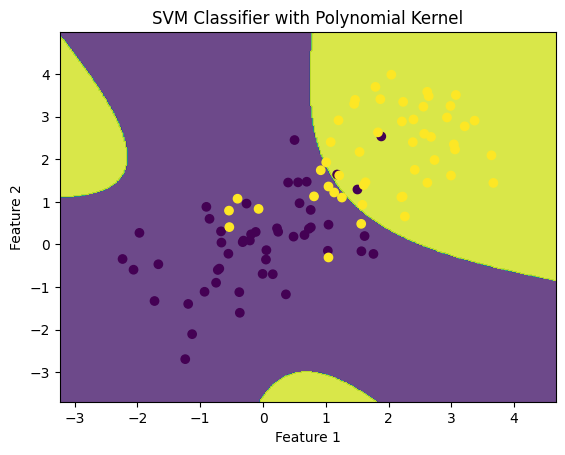

In [5]:
#24. Write a Python program to train an SVM classifier with a polynomial kernel and visualize the decision boundary.
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate a sample dataset
np.random.seed(0)
mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, 50)

mean2 = [2, 2]
cov2 = [[1, 0.5], [0.5, 1]]
data2 = np.random.multivariate_normal(mean2, cov2, 50)

X = np.vstack((data1, data2))
y = np.hstack((np.zeros(50), np.ones(50)))

# Train an SVM classifier with a polynomial kernel
svm_classifier = svm.SVC(kernel='poly', degree=3)
svm_classifier.fit(X, y)

# Create a meshgrid to visualize the decision boundary
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the meshgrid
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Classifier with Polynomial Kernel')
plt.show()

In [6]:
#25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy.
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gaussian Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158


In [7]:
#26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer(stop_words='english')
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# Train a Multinomial Naïve Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_count, y_train)

# Make predictions on the test set
y_pred = mnb.predict(X_test_count)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

Accuracy: 0.6685815289438798
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.77      0.42      0.55        97
           comp.graphics       0.54      0.68      0.60       104
 comp.os.ms-windows.misc       0.80      0.03      0.07       115
comp.sys.ibm.pc.hardware       0.54      0.78      0.64       123
   comp.sys.mac.hardware       0.97      0.52      0.67       126
          comp.windows.x       0.58      0.91      0.71       106
            misc.forsale       0.82      0.65      0.72       109
               rec.autos       0.87      0.71      0.78       139
         rec.motorcycles       0.89      0.64      0.74       122
      rec.sport.baseball       0.60      0.82      0.69       102
        rec.sport.hockey       0.83      0.82      0.83       108
               sci.crypt       0.59      0.88      0.71       125
         sci.electronics       0.79      0.63      0.70       114
                 sci.me

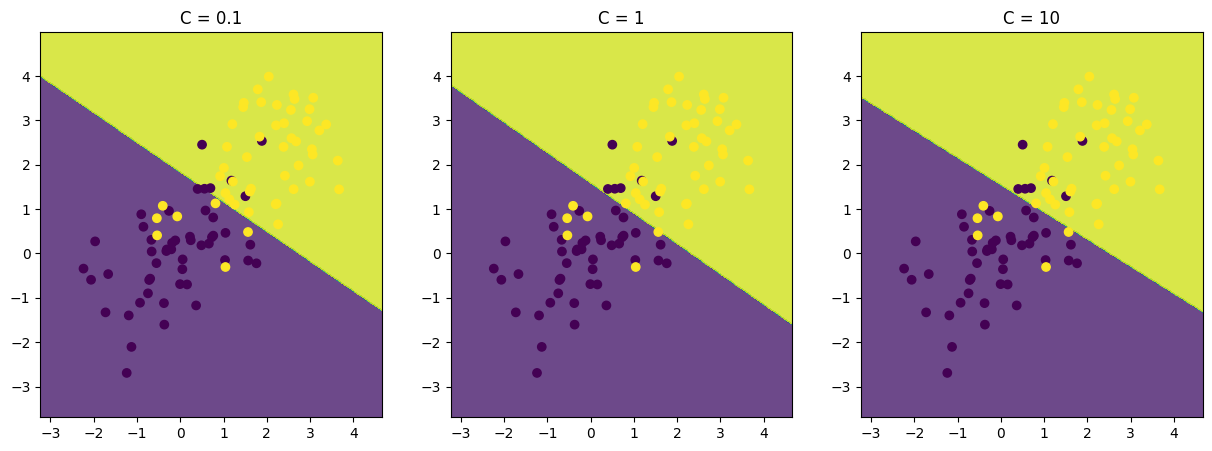

In [8]:
#27. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually.
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate a sample dataset
np.random.seed(0)
mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, 50)

mean2 = [2, 2]
cov2 = [[1, 0.5], [0.5, 1]]
data2 = np.random.multivariate_normal(mean2, cov2, 50)

X = np.vstack((data1, data2))
y = np.hstack((np.zeros(50), np.ones(50)))

# Train SVM classifiers with different C values
C_values = [0.1, 1, 10]
fig, axs = plt.subplots(1, len(C_values), figsize=(15, 5))

for i, C in enumerate(C_values):
    svm_classifier = svm.SVC(kernel='linear', C=C)
    svm_classifier.fit(X, y)

    # Create a meshgrid to visualize the decision boundary
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Make predictions on the meshgrid
    Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    axs[i].contourf(xx, yy, Z, alpha=0.8)
    axs[i].scatter(X[:, 0], X[:, 1], c=y)
    axs[i].set_title(f'C = {C}')

plt.show()

In [9]:
#28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features.
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# Generate a sample dataset with binary features
X, y = make_classification(n_samples=100, n_features=10, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, random_state=42)
X = (X > 0).astype(int)  # Convert features to binary

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Bernoulli Naïve Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bnb.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



In [10]:
#29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data.
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM model on unscaled data
svm_unscaled = svm.SVC(kernel='linear', C=1)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print("Accuracy (Unscaled Data):", accuracy_unscaled)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM model on scaled data
svm_scaled = svm.SVC(kernel='linear', C=1)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy (Scaled Data):", accuracy_scaled)

# Compare results
print("Difference in Accuracy:", accuracy_scaled - accuracy_unscaled)

Accuracy (Unscaled Data): 1.0
Accuracy (Scaled Data): 0.9666666666666667
Difference in Accuracy: -0.033333333333333326


In [11]:
#30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing.
# Import necessary libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Multinomial Naïve Bayes model without Laplace smoothing
mnb_without_smoothing = MultinomialNB(alpha=0)
mnb_without_smoothing.fit(X_train, y_train)
y_pred_without_smoothing = mnb_without_smoothing.predict(X_test)
accuracy_without_smoothing = accuracy_score(y_test, y_pred_without_smoothing)
print("Accuracy (Without Smoothing):", accuracy_without_smoothing)

# Train a Multinomial Naïve Bayes model with Laplace smoothing
mnb_with_smoothing = MultinomialNB(alpha=1)
mnb_with_smoothing.fit(X_train, y_train)
y_pred_with_smoothing = mnb_with_smoothing.predict(X_test)
accuracy_with_smoothing = accuracy_score(y_test, y_pred_with_smoothing)
print("Accuracy (With Smoothing):", accuracy_with_smoothing)

# Compare results
print("Difference in Accuracy:", accuracy_with_smoothing - accuracy_without_smoothing)

Accuracy (Without Smoothing): 0.09166666666666666
Accuracy (With Smoothing): 0.9111111111111111
Difference in Accuracy: 0.8194444444444444


/usr/local/lib/python3.11/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [12]:
#31. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel).
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

# Train an SVM classifier with GridSearchCV
svm_classifier = svm.SVC()
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
#32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check if it improves accuracy.
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=0, n_repeated=0, n_classes=2, weights=[0.9, 0.1], random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM classifier without class weighting
svm_unweighted = svm.SVC(kernel='linear', C=1)
svm_unweighted.fit(X_train, y_train)
y_pred_unweighted = svm_unweighted.predict(X_test)
accuracy_unweighted = accuracy_score(y_test, y_pred_unweighted)
print("Accuracy (Unweighted):", accuracy_unweighted)
print("Classification Report (Unweighted):")
print(classification_report(y_test, y_pred_unweighted))
print("Confusion Matrix (Unweighted):")
print(confusion_matrix(y_test, y_pred_unweighted))

# Train an SVM classifier with class weighting
svm_weighted = svm.SVC(kernel='linear', C=1, class_weight='balanced')
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print("Accuracy (Weighted):", accuracy_weighted)
print("Classification Report (Weighted):")
print(classification_report(y_test, y_pred_weighted))
print("Confusion Matrix (Weighted):")
print(confusion_matrix(y_test, y_pred_weighted))

# Compare results
print("Difference in Accuracy:", accuracy_weighted - accuracy_unweighted)

Accuracy (Unweighted): 0.91
Classification Report (Unweighted):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       176
           1       1.00      0.25      0.40        24

    accuracy                           0.91       200
   macro avg       0.95      0.62      0.68       200
weighted avg       0.92      0.91      0.89       200

Confusion Matrix (Unweighted):
[[176   0]
 [ 18   6]]
Accuracy (Weighted): 0.77
Classification Report (Weighted):
              precision    recall  f1-score   support

           0       0.96      0.77      0.85       176
           1       0.32      0.79      0.45        24

    accuracy                           0.77       200
   macro avg       0.64      0.78      0.65       200
weighted avg       0.89      0.77      0.81       200

Confusion Matrix (Weighted):
[[135  41]
 [  5  19]]
Difference in Accuracy: -0.14


In [14]:
#33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset (replace with your own dataset)
# For this example, we'll use a simple dataset with two columns: 'email' and 'label' (spam or ham)
data = {
    'email': ['Get free money now', 'Hello, how are you?', 'Win a prize', 'Meeting on Friday'],
    'label': ['spam', 'ham', 'spam', 'ham']
}
df = pd.DataFrame(data)

# Map labels to numerical values
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['label'], test_size=0.2, random_state=42)

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the vectorizer to the training data and transform both the training and testing data
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# Train a Multinomial Naïve Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_count, y_train)

# Make predictions on the test set
y_pred = mnb.predict(X_test_count)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Test the model with a new email
new_email = ['You have won a prize']
new_email_count = vectorizer.transform(new_email)
prediction = mnb.predict(new_email_count)
print("Prediction:", 'spam' if prediction[0] == 1 else 'ham')

Accuracy: 0.0
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Confusion Matrix:
[[0 1]
 [0 0]]
Prediction: spam


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [15]:
#34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy.
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = svm.SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

# Train a Naïve Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naïve Bayes Accuracy:", accuracy_nb)

# Compare accuracy
print("Difference in Accuracy:", accuracy_svm - accuracy_nb)
if accuracy_svm > accuracy_nb:
    print("SVM performs better")
elif accuracy_nb > accuracy_svm:
    print("Naïve Bayes performs better")
else:
    print("Both classifiers perform equally well")

SVM Accuracy: 1.0
Naïve Bayes Accuracy: 1.0
Difference in Accuracy: 0.0
Both classifiers perform equally well


In [16]:
#35. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results.
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naïve Bayes classifier without feature selection
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy without feature selection:", accuracy_nb)

# Perform feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train a Naïve Bayes classifier with feature selection
nb_classifier_selected = GaussianNB()
nb_classifier_selected.fit(X_train_selected, y_train)
y_pred_nb_selected = nb_classifier_selected.predict(X_test_selected)
accuracy_nb_selected = accuracy_score(y_test, y_pred_nb_selected)
print("Accuracy with feature selection:", accuracy_nb_selected)

# Compare results
print("Difference in Accuracy:", accuracy_nb_selected - accuracy_nb)
if accuracy_nb_selected > accuracy_nb:
    print("Feature selection improves accuracy")
elif accuracy_nb > accuracy_nb_selected:
    print("Feature selection reduces accuracy")
else:
    print("Feature selection has no impact on accuracy")

Accuracy without feature selection: 1.0
Accuracy with feature selection: 1.0
Difference in Accuracy: 0.0
Feature selection has no impact on accuracy


In [17]:
#36. Write a Python program to train an SVM Classifier using one-vs-rest (OvR) and one-vs-one (OvO) strategies on the Wine dataset and compare their accuracy.
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier using one-vs-rest strategy
ovr_svm = OneVsRestClassifier(svm.SVC(kernel='linear', C=1))
ovr_svm.fit(X_train, y_train)
y_pred_ovr = ovr_svm.predict(X_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print("Accuracy (One-vs-Rest):", accuracy_ovr)

# Train an SVM classifier using one-vs-one strategy
ovo_svm = OneVsOneClassifier(svm.SVC(kernel='linear', C=1))
ovo_svm.fit(X_train, y_train)
y_pred_ovo = ovo_svm.predict(X_test)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
print("Accuracy (One-vs-One):", accuracy_ovo)

# Compare accuracy
print("Difference in Accuracy:", accuracy_ovr - accuracy_ovo)
if accuracy_ovr > accuracy_ovo:
    print("One-vs-Rest performs better")
elif accuracy_ovo > accuracy_ovr:
    print("One-vs-One performs better")
else:
    print("Both strategies perform equally well")

Accuracy (One-vs-Rest): 1.0
Accuracy (One-vs-One): 1.0
Difference in Accuracy: 0.0
Both strategies perform equally well


In [18]:
#37. Write a Python program to train an SVM Classifier using linear, polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy.
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM classifier using linear kernel
svm_linear = svm.SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy (Linear Kernel):", accuracy_linear)

# Train an SVM classifier using polynomial kernel
svm_poly = svm.SVC(kernel='poly', degree=3, C=1)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Accuracy (Polynomial Kernel):", accuracy_poly)

# Train an SVM classifier using RBF kernel
svm_rbf = svm.SVC(kernel='rbf', C=1)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy (RBF Kernel):", accuracy_rbf)

# Compare accuracy
print("Comparison of Accuracy:")
print(f"Linear Kernel: {accuracy_linear:.3f}")
print(f"Polynomial Kernel: {accuracy_poly:.3f}")
print(f"RBF Kernel: {accuracy_rbf:.3f}")

if accuracy_linear > accuracy_poly and accuracy_linear > accuracy_rbf:
    print("Linear kernel performs best")
elif accuracy_poly > accuracy_linear and accuracy_poly > accuracy_rbf:
    print("Polynomial kernel performs best")
else:
    print("RBF kernel performs best")

Accuracy (Linear Kernel): 0.956140350877193
Accuracy (Polynomial Kernel): 0.868421052631579
Accuracy (RBF Kernel): 0.9824561403508771
Comparison of Accuracy:
Linear Kernel: 0.956
Polynomial Kernel: 0.868
RBF Kernel: 0.982
RBF kernel performs best


In [19]:
#38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy.
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Apply feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the number of folds for Stratified K-Fold Cross-Validation
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Initialize lists to store accuracy scores
accuracy_scores = []

# Train an SVM classifier using Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train an SVM classifier
    svm_classifier = svm.SVC(kernel='linear', C=1)
    svm_classifier.fit(X_train, y_train)

    # Predict and compute accuracy
    y_pred = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Compute the average accuracy
average_accuracy = sum(accuracy_scores) / k
print("Accuracy Scores:", accuracy_scores)
print("Average Accuracy:", average_accuracy)

Accuracy Scores: [1.0, 1.0, 0.8666666666666667, 1.0, 0.9666666666666667]
Average Accuracy: 0.9666666666666666


In [20]:
#39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance.
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naïve Bayes classifier with default prior probabilities
gnb_default = GaussianNB()
gnb_default.fit(X_train, y_train)
y_pred_default = gnb_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
print("Accuracy (Default Priors):", accuracy_default)

# Train a Naïve Bayes classifier with uniform prior probabilities
priors_uniform = [1/len(iris.target_names) for _ in iris.target_names]
gnb_uniform = GaussianNB(priors=priors_uniform)
gnb_uniform.fit(X_train, y_train)
y_pred_uniform = gnb_uniform.predict(X_test)
accuracy_uniform = accuracy_score(y_test, y_pred_uniform)
print("Accuracy (Uniform Priors):", accuracy_uniform)

# Train a Naïve Bayes classifier with custom prior probabilities
priors_custom = [0.7, 0.2, 0.1]  # Example custom priors
gnb_custom = GaussianNB(priors=priors_custom)
gnb_custom.fit(X_train, y_train)
y_pred_custom = gnb_custom.predict(X_test)
accuracy_custom = accuracy_score(y_test, y_pred_custom)
print("Accuracy (Custom Priors):", accuracy_custom)

# Compare performance
print("Comparison of Accuracy:")
print(f"Default Priors: {accuracy_default:.3f}")
print(f"Uniform Priors: {accuracy_uniform:.3f}")
print(f"Custom Priors: {accuracy_custom:.3f}")

if accuracy_default > accuracy_uniform and accuracy_default > accuracy_custom:
    print("Default priors perform best")
elif accuracy_uniform > accuracy_default and accuracy_uniform > accuracy_custom:
    print("Uniform priors perform best")
else:
    print("Custom priors perform best")

Accuracy (Default Priors): 1.0
Accuracy (Uniform Priors): 1.0
Accuracy (Custom Priors): 1.0
Comparison of Accuracy:
Default Priors: 1.000
Uniform Priors: 1.000
Custom Priors: 1.000
Custom priors perform best


In [21]:
#40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy.
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM classifier without RFE
svm_classifier = svm.SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy_without_rfe = accuracy_score(y_test, y_pred)
print("Accuracy without RFE:", accuracy_without_rfe)

# Perform Recursive Feature Elimination (RFE) before training an SVM classifier
rfe = RFE(estimator=svm.SVC(kernel='linear', C=1), n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Train an SVM classifier with RFE
svm_classifier_rfe = svm.SVC(kernel='linear', C=1)
svm_classifier_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_classifier_rfe.predict(X_test_rfe)
accuracy_with_rfe = accuracy_score(y_test, y_pred_rfe)
print("Accuracy with RFE:", accuracy_with_rfe)

# Compare accuracy
print("Difference in Accuracy:", accuracy_with_rfe - accuracy_without_rfe)
if accuracy_with_rfe > accuracy_without_rfe:
    print("RFE improves accuracy")
elif accuracy_without_rfe > accuracy_with_rfe:
    print("RFE reduces accuracy")
else:
    print("RFE has no impact on accuracy")

Accuracy without RFE: 0.9666666666666667
Accuracy with RFE: 1.0
Difference in Accuracy: 0.033333333333333326
RFE improves accuracy


In [22]:
#41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy.
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load the dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# We'll use a binary classification problem, so let's convert the labels to binary
# We'll consider class 0 as the positive class and classes 1 and 2 as the negative class
y_binary = (y == 0).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM classifier
svm_classifier = svm.SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the SVM classifier using Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Compare the performance metrics
print("Performance Comparison:")
if precision > recall:
    print("The model is more precise than sensitive")
elif recall > precision:
    print("The model is more sensitive than precise")
else:
    print("The model has balanced precision and recall")

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Performance Comparison:
The model has balanced precision and recall


In [23]:
#42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss).
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss
import numpy as np

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = gnb.predict_proba(X_test)

# Evaluate the performance of the Naïve Bayes classifier using Log Loss
logloss = log_loss(y_test, y_pred_proba)
print("Log Loss:", logloss)

Log Loss: 0.02625269787231071


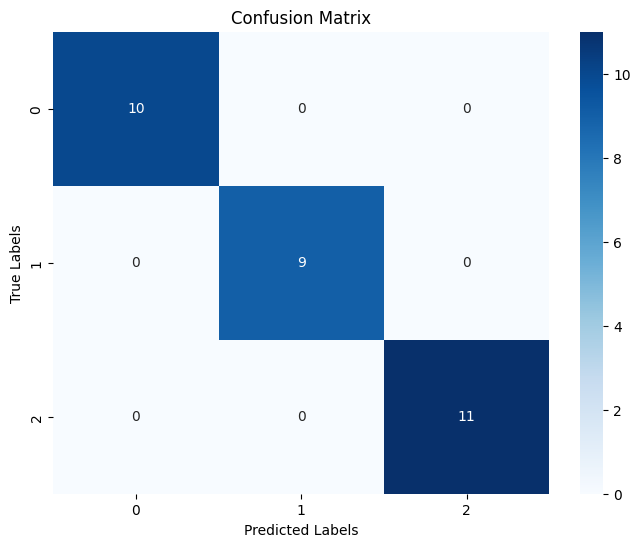

In [24]:
#43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = svm.SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

# Create a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
#44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE.
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Load the California Housing dataset
cal_housing = datasets.fetch_california_housing()
X = cal_housing.data
y = cal_housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM Regressor (SVR)
svr = svm.SVR(kernel='rbf', C=1)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

# Evaluate the performance of the SVR using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.39859828301457567


In [27]:
#45. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score.
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
y_binary = (y == 0).astype(int)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = gnb.predict_proba(X_test)[:, 1]

# Evaluate the performance
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 1.0


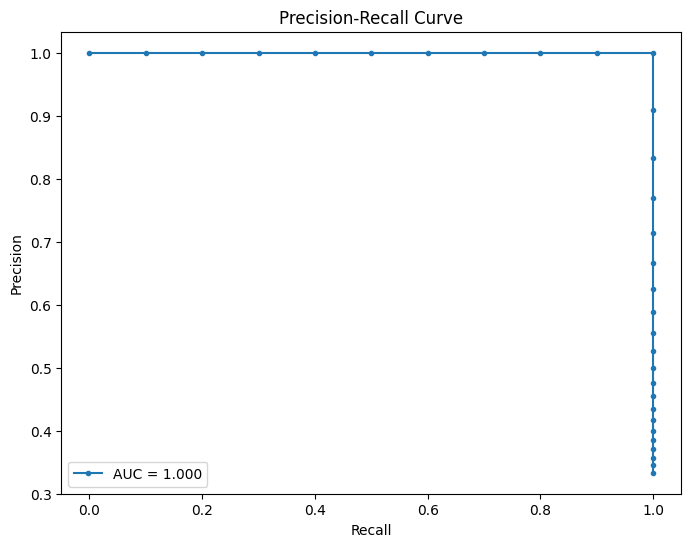

In [28]:
#46.  Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset (e.g., Iris dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Since Precision-Recall Curve is typically used for binary classification,
# let's convert the labels to binary (e.g., class 0 vs rest)
y_binary = (y == 0).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Apply feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM classifier
svm_classifier = svm.SVC(kernel='linear', C=1, probability=True)
svm_classifier.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = svm_classifier.predict_proba(X_test)[:, 1]

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
auc_precision_recall = auc(recall, precision)

# Visualize the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AUC = {auc_precision_recall:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()